In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2
from clib.bellhop import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
bell = bellhop({'mediterrannee': '../SSP_4profils.mat'},name='cognac_cmap',rmax=100.)

---
# Profil constant : résultats Bellhop

In [3]:
### read file .arr 
Arr, Pos = bell.read_arrivals_asc ('../files_arr/isocel.arr', Narrmx = 45)

Max.number of arrivals for source index 0 is 42


Nombre total de réponses impulsionnelles :  20


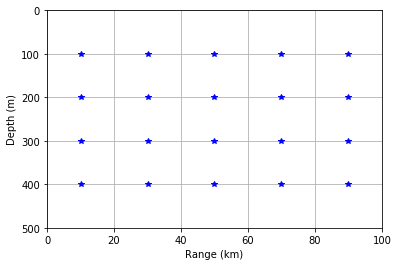

In [4]:
### Reponses impulsionnelles
D = np.array([100., 200., 300., 400.])
R = np.array([10., 30., 50., 70., 90.]) * 1000.
print('Nombre total de réponses impulsionnelles : ', D.size * R.size)

meshD, meshR = np.meshgrid(D, R)
plt.figure()
plt.plot(meshR/1000., meshD, '*b')
plt.xlabel('Range (km)')
plt.ylabel('Depth (m)')
plt.ylim ([0,500])
plt.xlim([0,100])
plt.gca().invert_yaxis()
plt.grid()

In [5]:
### Indices correspondants
IRD = np.zeros_like(D)
for i in range (D.size) : 
    IRD[i] = np.where(Pos['r']['depth']==D[i])[0][0]
    
IRR = np.zeros_like(R)
for i in range (R.size) : 
    IRR[i] = np.where(Pos['r']['range']==R[i])[0][0]

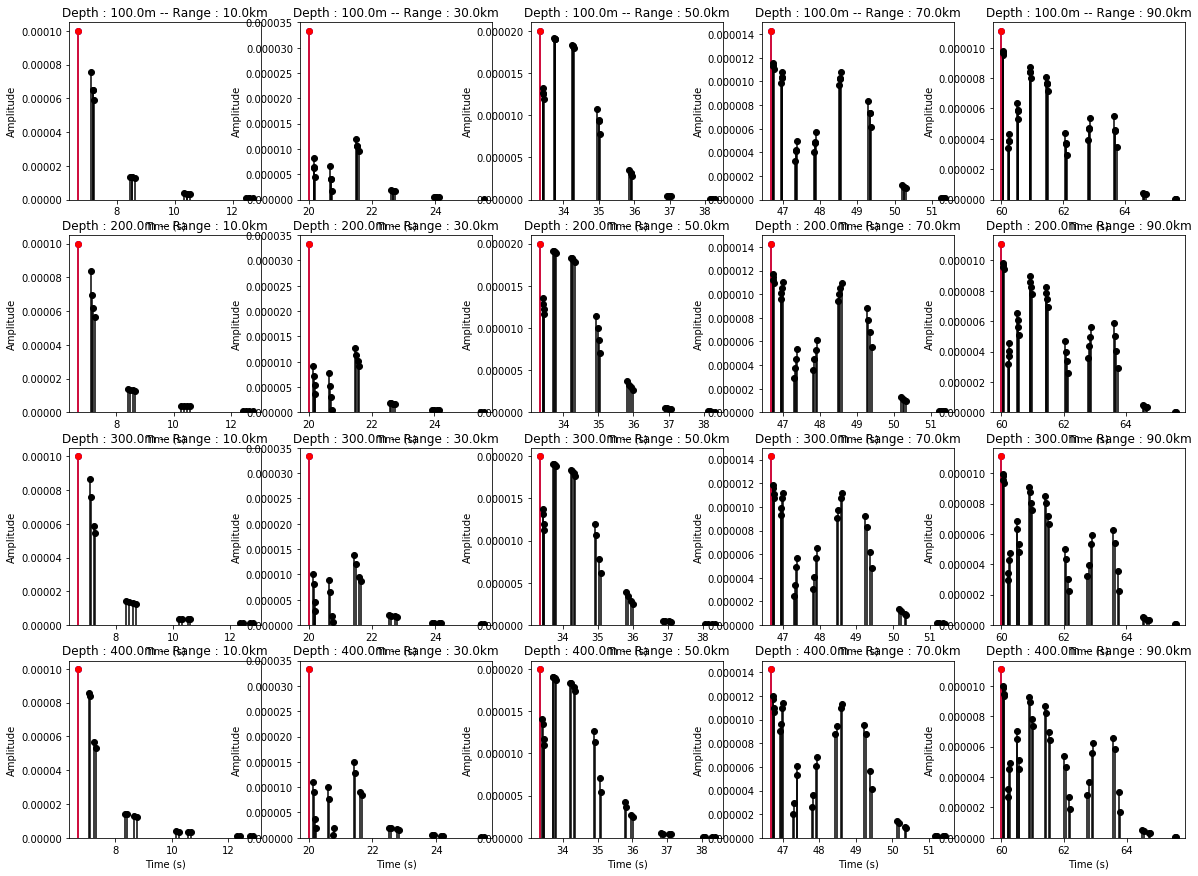

In [6]:
isd = 0       # choice of source depth

Num_arr = []
Total_time = []
Dt_first = []
Dt_second = []

plt.figure(figsize=(20,15))
k = 0
for i in range (IRD.size):
    for j in range(IRR.size):
        k+=1
        ird = int(IRD[i])     # choice of receiver depth
        irr = int(IRR[j])     # choice of receiver range
        plt.subplot(IRD.size,IRR.size,k)
        bell.plotarr(Arr, Pos, irr, ird, isd)

        Narr = int(Arr['Narr'][irr,ird,isd])
        Num_arr.append (Narr)
        times = Arr['delay'][irr, :Narr, ird, isd]
        Total_time.append(np.max(times)-np.min(times))
        sort = sorted(times)
        Dt_first.append(sort[1] - sort[0])
        Dt_second.append(sort[2] - sort[1])

In [7]:
n = R.size
print('Etalement temporel total : \n')
print ('                   10km      30km      50km      70km      90km\n')
for i in range(D.size) :  
    print('  Depth = %dm :   %.2fs     %.2fs     %.2fs     %.2fs     %.2fs' %(D[i], Total_time[n*i], \
                                                                        Total_time[n*i+1], Total_time[n*i+2], \
                                                                        Total_time[n*i+3], Total_time[n*i+4]))

Etalement temporel total : 

                   10km      30km      50km      70km      90km

  Depth = 100m :   6.03s     5.53s     4.94s     4.70s     5.66s
  Depth = 200m :   6.08s     5.57s     4.97s     4.73s     5.63s
  Depth = 300m :   6.14s     5.53s     5.00s     4.76s     5.60s
  Depth = 400m :   6.19s     5.49s     5.03s     4.78s     5.58s


In [8]:
#### Comment la limite de temps est-elle fixée par Bellhop ? 

In [9]:
 print("Nombre d'arrivées : \n")
print ('                  10km    30km    50km    70km    90km\n')
for i in range(D.size) :  
    print('  Depth = %dm :   %.d      %.d      %.d      %.d      %.d' %(D[i], Num_arr[n*i], \
                                                                    Num_arr[n*i +1], Num_arr[n*i +2], \
                                                                    Num_arr[n*i +3], Num_arr[n*i +4]))

Nombre d'arrivées : 

                  10km    30km    50km    70km    90km

  Depth = 100m :   18      23      30      34      41
  Depth = 200m :   18      24      30      34      40
  Depth = 300m :   18      24      30      34      40
  Depth = 400m :   18      24      30      34      40


---
### Zoom sur les 1ères arrivées

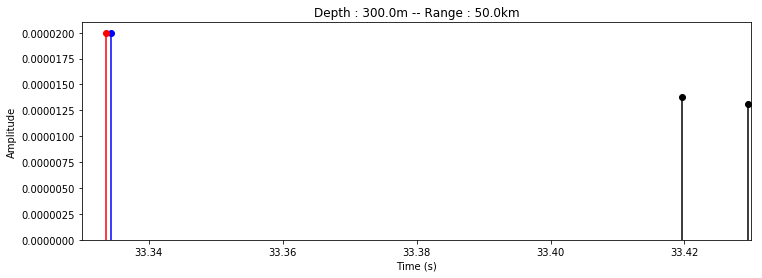

In [10]:
isd = 0       # choice of source depth : 100m
ird = 3       # depth : 300m    
irr = 5       # range : 50km   
plt.figure(figsize=(12,4))
bell.plotarr(Arr, Pos, irr, ird, isd)
plt.xlim([33.33, 33.43])
plt.show()

In [11]:
print('Intervalle de temps entre la 1ère et 2ème arrivée : \n')
print ('                      10km         30km         50km        70km        90km\n')
for i in range(D.size) :  
        print('  Depth = %dm :   %.3es   %.3es   %.3es   %.3es   %.3es' %(D[i], Dt_first[n*i], Dt_first[n*i+1],\
                                                            Dt_first[n*i+2], Dt_first[n*i+3], Dt_first[n*i+4]))

Intervalle de temps entre la 1ère et 2ème arrivée : 

                      10km         30km         50km        70km        90km

  Depth = 100m :   1.333e-03s   4.444e-04s   2.670e-04s   1.908e-04s   1.488e-04s
  Depth = 200m :   2.666e-03s   8.889e-04s   5.303e-04s   3.853e-04s   2.899e-04s
  Depth = 300m :   3.998e-03s   1.335e-03s   8.011e-04s   5.684e-04s   4.425e-04s
  Depth = 400m :   5.329e-03s   1.778e-03s   1.068e-03s   7.629e-04s   5.951e-04s


In [12]:
print ('Une erreur en temps dt = 5.e-3s entraîne une erreur en distance de %.1fm' %(5.e-3*1500.))

Une erreur en temps dt = 5.e-3s entraîne une erreur en distance de 7.5m


In [13]:
print('Intervalle de temps entre la 2ème et 3ème arrivée : \n')
print ('                      10km         30km         50km        70km        90km\n')
for i in range(D.size) :  
        print('  Depth = %dm :   %.3es   %.3es   %.3es   %.3es   %.3es' %(D[i], Dt_second[n*i], Dt_second[n*i+1],\
                                                        Dt_second[n*i+2], Dt_second[n*i+3], Dt_second[n*i+4]))

Intervalle de temps entre la 2ème et 3ème arrivée : 

                      10km         30km         50km        70km        90km

  Depth = 100m :   4.638e-01s   1.594e-01s   9.586e-02s   6.852e-02s   5.331e-02s
  Depth = 200m :   4.387e-01s   1.505e-01s   9.055e-02s   6.472e-02s   5.035e-02s
  Depth = 300m :   4.135e-01s   1.417e-01s   8.522e-02s   6.091e-02s   4.739e-02s
  Depth = 400m :   3.882e-01s   1.329e-01s   7.990e-02s   5.711e-02s   4.442e-02s


In [14]:
### Autres indicateurs pertinents à trouver ... 

In [15]:
### TO COMPARE WITH MY METHOD

## Profil d'hiver

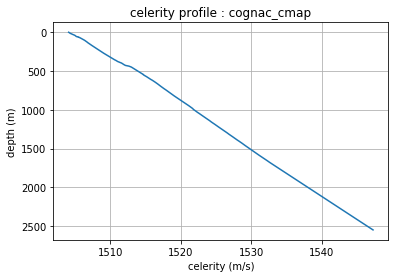

In [16]:
bell.plotssp('mediterrannee', Issp=1, zoom=False)

In [17]:
### read file .arr 
Arr2, Pos2 = bell.read_arrivals_asc ('../files_arr/prof_hiver.arr', Narrmx = 470)

Max.number of arrivals for source index 0 is 339


In [18]:
### Indices correspondants
IRD2 = np.zeros_like(D)
for i in range (D.size) : 
    IRD2[i] = np.where(Pos2['r']['depth']==D[i])[0][0]
    
IRR2 = np.zeros_like(R)
for i in range (R.size) : 
    IRR2[i] = np.where(Pos2['r']['range']==R[i])[0][0]

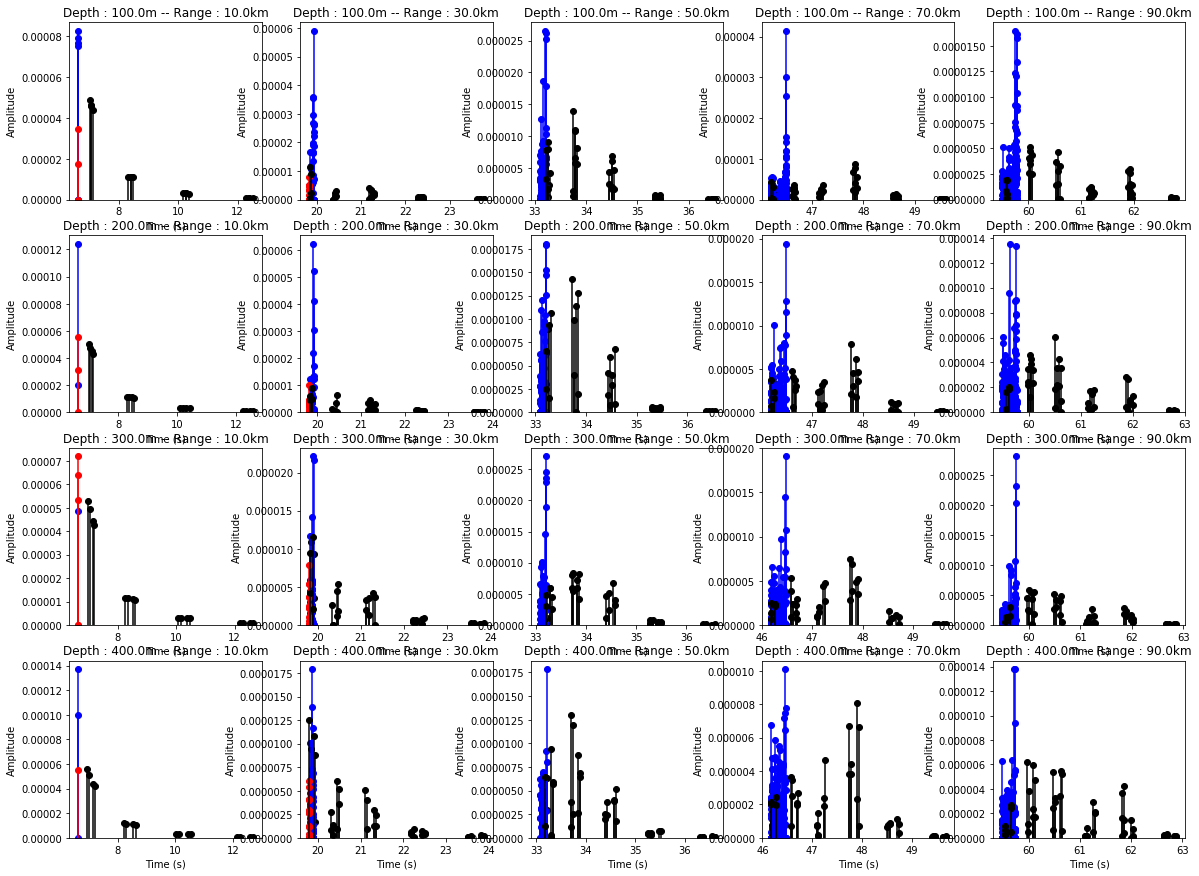

In [19]:
Num_arr2 = []
Total_time2 = []
Dt_first2 = []
Amp_min2 = []
Diff_time2 = []

plt.figure(figsize=(20,15))
k = 0
for i in range (IRD2.size):
    for j in range(IRR2.size):
        k+=1
        ird = int(IRD2[i])     # choice of receiver depth
        irr = int(IRR2[j])     # choice of receiver range
        plt.subplot(IRD2.size,IRR2.size,k)
        bell.plotarr(Arr2, Pos2, irr, ird, isd)

        Narr = int(Arr2['Narr'][irr,ird,isd])
        Num_arr2.append (Narr)
        times = Arr2['delay'][irr, :Narr, ird, isd]
        Total_time2.append(np.max(times)-np.min(times))
        sort = sorted(times)
        Dt_first2.append(sort[1] - sort[0])
        
        amp = Arr2['A'][irr,:Narr, ird, isd]
        Amp_min2.append(np.min(abs(amp)))
        
        t_amp_max = times[np.where(np.max(amp))][0]
        diff = np.min (abs(times[times!=t_amp_max] - t_amp_max))
        Diff_time2.append(diff)
              

In [20]:
print('Etalement temporel total : \n')
print ('                   10km      30km      50km      70km      90km\n')
for i in range(D.size) :  
    print('  Depth = %dm :   %.2fs     %.2fs     %.2fs     %.2fs     %.2fs' %(D[i], Total_time2[n*i], \
                                                                        Total_time2[n*i+1], Total_time2[n*i+2], \
                                                                        Total_time2[n*i+3], Total_time2[n*i+4]))

Etalement temporel total : 

                   10km      30km      50km      70km      90km

  Depth = 100m :   5.88s     3.95s     3.41s     3.40s     3.32s
  Depth = 200m :   5.94s     4.00s     3.45s     3.44s     3.36s
  Depth = 300m :   6.00s     4.05s     3.49s     3.47s     3.39s
  Depth = 400m :   6.06s     4.10s     3.53s     3.51s     3.42s


In [21]:
print("Nombre d'arrivées : \n")
print ('                  10km    30km    50km    70km    90km\n')
for i in range(D.size) :  
    print('  Depth = %dm :   %.d      %.d      %.d      %.d      %.d' %(D[i], Num_arr2[n*i], \
                                                                    Num_arr2[n*i +1], Num_arr2[n*i +2], \
                                                                    Num_arr2[n*i +3], Num_arr2[n*i +4]))

Nombre d'arrivées : 

                  10km    30km    50km    70km    90km

  Depth = 100m :   26      159      162      238      281
  Depth = 200m :   21      143      136      225      266
  Depth = 300m :   22      121      126      221      239
  Depth = 400m :   20      123      102      218      250


In [22]:
print("Amplitude minimum : \n")
print ('                    10km          30km         50km         70km         90km\n')
for i in range(D.size) :  
    print('  Depth = %dm :   %.2e     %.2e     %.2e     %.2e     %.2e' %(D[i], Amp_min2[n*i], \
                                                                        Amp_min2[n*i+1], Amp_min2[n*i+2], \
                                                                        Amp_min2[n*i+3], Amp_min2[n*i+4]))

Amplitude minimum : 

                    10km          30km         50km         70km         90km

  Depth = 100m :   1.14e-21     2.32e-23     1.51e-22     7.45e-23     2.11e-22
  Depth = 200m :   3.86e-21     4.30e-23     1.14e-22     1.53e-22     4.72e-22
  Depth = 300m :   4.85e-21     2.08e-23     1.60e-22     4.98e-23     2.55e-22
  Depth = 400m :   2.21e-20     6.62e-23     3.01e-22     6.18e-23     2.04e-22


In [23]:
print("Intervalle entre le temps du maximum d'amplitude et son plus proche voisin : \n")
print ('                    10km          30km         50km         70km         90km\n')
for i in range(D.size) :  
    print('  Depth = %dm :   %.2es     %.2es     %.2es     %.2es     %.2es' %(D[i], Diff_time2[n*i], \
                                                                        Diff_time2[n*i+1], Diff_time2[n*i+2], \
                                                                        Diff_time2[n*i+3], Diff_time2[n*i+4]))

Intervalle entre le temps du maximum d'amplitude et son plus proche voisin : 

                    10km          30km         50km         70km         90km

  Depth = 100m :   1.13e-01s     2.00e-04s     1.18e-04s     5.46e-04s     4.80e-02s
  Depth = 200m :   1.14e-01s     1.11e-04s     2.86e-04s     4.08e-04s     6.10e-05s
  Depth = 300m :   1.14e-01s     1.49e-04s     3.82e-04s     2.25e-04s     3.43e-04s
  Depth = 400m :   1.14e-01s     8.39e-05s     2.14e-04s     5.04e-04s     3.36e-04s


----
### Zoom

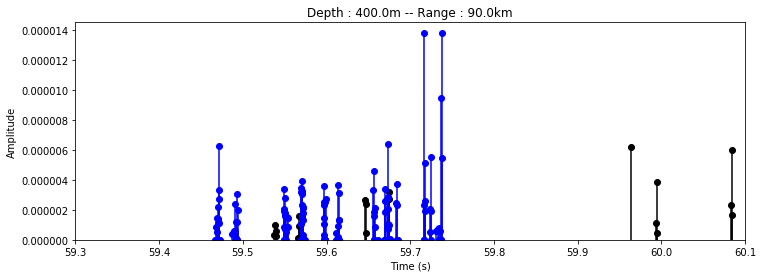

In [24]:
isd = 0       # choice of source depth : 100m
ird = 4       # depth : 400m    
irr = 9       # range : 90km   
plt.figure(figsize=(12,4))
bell.plotarr(Arr2, Pos2, irr, ird, isd)
plt.xlim([59.3, 60.1])
plt.show()